#### Modelo de Equilibro keynesiano 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$ Y= C+c\alpha(Y-T)+I+G $$


$$
C = 100 + 0.8Y_{d}\\  I=80\\ G=200\\ Tx= 100
$$ 


In [2]:
Y = 1

In [3]:
Tx = 100
G = 200
I = 80
T = Tx


In [4]:
Yd= np.array([Y,T]) * 0.8

In [5]:
Yd

array([ 0.8, 80. ])

In [6]:
Yd[0]

0.8

In [7]:
multiplicador=1/ (Y - Yd[0])

In [8]:
C = 100 - Yd[1]

In [9]:
C

20.0

In [10]:
Yd[0]

0.8

In [11]:
A = C+I+G
A

300.0

In [12]:
Y = format(multiplicador*A,'.1f')

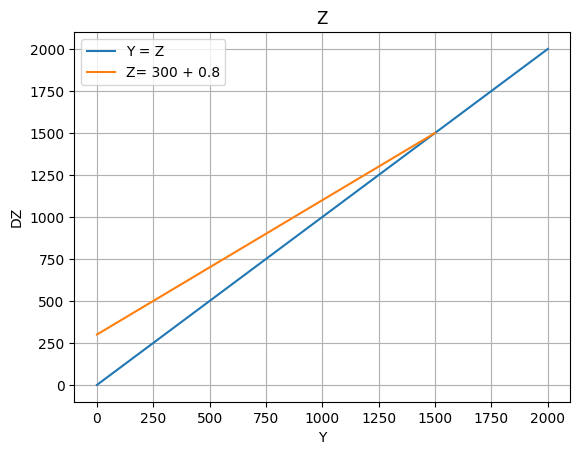

In [13]:
x1 = np.linspace(0, 2000, 100)  
x2 = 0 + 1 * x1  

dz = np.linspace(0,float(Y),100)
y = A + Yd[0]*dz

# ejes hor ,ver
plt.plot(x1, x2, label=f'Y = Z')

plt.plot(dz, y, label=f"Z= {format(A,'.0f')} + {Yd[0]}")
plt.xlabel('Y')  
plt.ylabel('DZ')  
plt.title('Z')  
plt.grid(True)  
plt.legend()  


plt.show()


In [14]:
def aggde_eq_plot(Y=Y,A=A,Yd_zero=Yd[0]):
    
    x1 = np.linspace(0, Y+Y*.3, 100)  
    x2 = 0 + 1 * x1  

    dz = np.linspace(0,Y+Y*.3,100)
    y = A + Yd_zero*dz

    plt.plot(x1, x2, label=f'Y = Z')
    plt.plot(dz, y, label=f"Z= {format(A,'.0f')} + {Yd_zero}")
    plt.xlabel('Y')  
    plt.ylabel('DZ')  
    plt.title('Z') 
    plt.grid(True) 
    plt.legend()  

    
    return plt.show()
    
    


In [15]:
Y

'1500.0'

In [16]:
A

300.0

In [17]:
Yd[0]

0.8

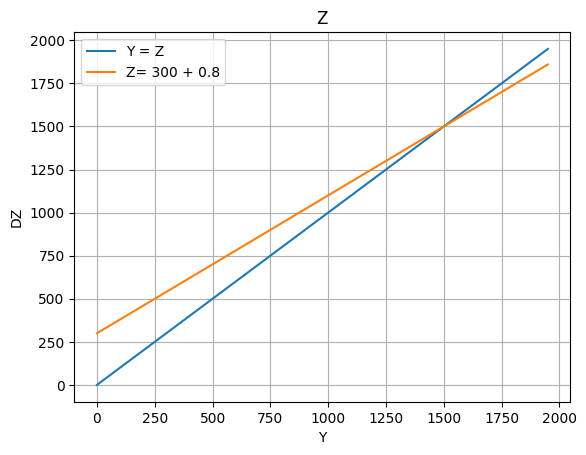

In [18]:
aggde_eq_plot(float(Y),A=A,Yd_zero=Yd[0])

In [19]:
def cal_eq_dem(G = 200,I = 80,T = [100],C=100,pc= 0.8):
    Y=1
    #que pasa cuando tienes mas argumentos en T
    Yd = np.array([Y,T[0]]) * pc
    multiplicador=1/ (Y- Yd[0])
    A = C+I+G-Yd[1]
    Y = format(multiplicador*A,'.1f')
    return Y,A,Yd[0]
        
    

In [20]:
cal_eq_dem(G = 200,I = 90,T = [100],C=100,pc= 0.8)

('1550.0', 310.0, 0.8)

In [21]:
T=0

Caso Dos

In [22]:
#caso dos
Tr=0
Y= 1
Tx_m_fija = 200
Tx_t_advalorem = 0.1*Y
Yd = Y-T
G= 100
C= 200 
c= 0.7
i =10/100
I= 900 -1200*i 


$$ Y= C+c\alpha(Y-T-\tau Y)+I+G $$


$$
C = 200 + 0.7Y_{d}\\  I=900-1200i\\ G=100\\ Tx= 200 +0.1Y
$$ 


$$Yd = Y-T+Tr$$
Donde 
$$T = a + bY$$


In [23]:
T = Tx

In [24]:
Yd= np.array([Y,T])

In [25]:
#construimos el multiplicador
alpha = Y/Y-c*(1-Tx_t_advalorem)

In [26]:
alpha

0.37

In [27]:
def demand_agg(G = 1,I = [],T=[],C=[],i=100):
    """
G representa el gasto de gobierno
I es una lista que puede contener el valor de inversión fija y el parametro de sensibilidad de inversión
T es una lista que puede contener el impuesto fijo y la tasa de impuesto al ingreso
C es una lista que contiene el consumo autonomo como primer argumento y la propensión marginal a consumir
i  es la tasa de interes, en caso de que no sea necesaria por defecto es 100

El resultado es una tupla que contiene :

- La renta en equilibrio
- El valor del componente exógeno (el intercepto)
- El multiplicador 
    """
    Y=1

    if len(T) and len(I) >1:

        Tx= T[0] * C[1]
        multiplicador=1/ Y-C[1]*(1-T[1])
        inv= I[0] - I[1]*(i/100)
        A = C[0]+inv+G-Tx
        Y_equilibrio = format(A/multiplicador,'.1f')
        return Y_equilibrio,A,multiplicador

    else:

        Tx = T[0]* C[0]
        multiplicador=1/ (Y- C[1])
        inv=I

        A = C[0]+inv+G-Tx
        Y_equilibrio = format(A/multiplicador,'.1f')
        return Y_equilibrio,A,multiplicador
        

In [28]:
demand_agg(G = 100,I = [900,1200],T=[200,0.1],C=[200,0.7],i=10)

('2540.5', 940.0, 0.37)

In [29]:
ejemplodos = demand_agg(G = 100,I = [900,1200],T=[200,0.1],C=[200,0.7],i=10)

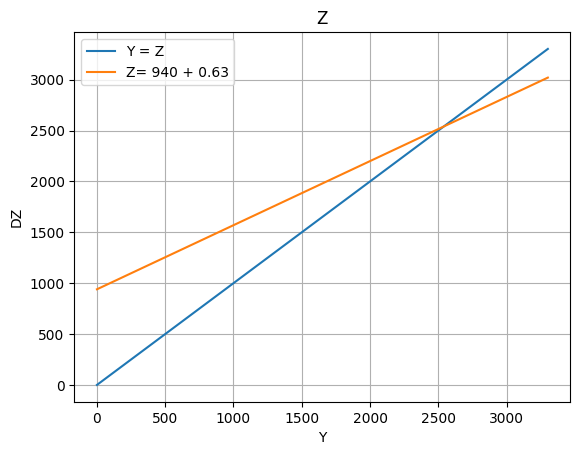

In [30]:
aggde_eq_plot(float(ejemplodos[0]),ejemplodos[1],(1-ejemplodos[2]))